# 1. Prepare data

In [2]:
import os
# Read image and mask paths
image_paths = []
mask_paths = []

images_root = r"kvasir-seg\Kvasir-SEG\images"
masks_root = r"kvasir-seg\Kvasir-SEG\masks"

image_files = sorted(os.listdir(images_root))
mask_files = sorted(os.listdir(masks_root))

for image, mask in zip(image_files, mask_files):
    image_paths.append(os.path.join(images_root, image))
    mask_paths.append(os.path.join(masks_root, mask))

### Try converting images and masks to their true channel and check number of channels of images and masks

In [3]:
from PIL import Image

print('Image: ', Image.open(image_paths[0]).convert('RGB').getbands())
print('Mask: ', Image.open(mask_paths[0]).convert('L').getbands())

Image:  ('R', 'G', 'B')
Mask:  ('L',)


### Check the shape of images and masks

In [4]:
import numpy as np

print('Images: ', np.array(Image.open(image_paths[0]).convert('RGB')).shape)
print('Masks: ', np.array(Image.open(mask_paths[0]).convert('L')).shape)
print(len(image_paths))

Images:  (529, 622, 3)
Masks:  (529, 622)
1000


### Show examples of data
#### Bài tập 1: Plot ảnh từ dataset ra, đối tượng cần load là 1 cặp mẫu dữ liệu, mỗi cặp bao gồm 1 image và 1 mask(Overlay mask lên ảnh luôn)

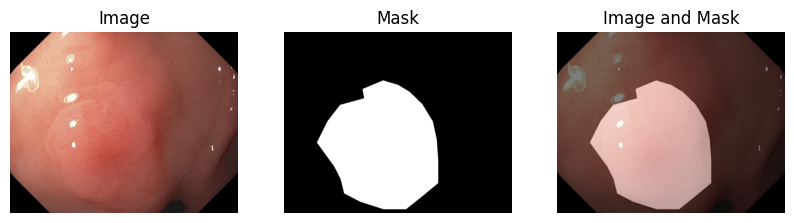

In [5]:
# TODO: Load the image and mask from the dataset and display them
import matplotlib.pyplot as plt

idx = 1
image = Image.open(image_paths[idx]).convert('RGB')
mask = Image.open(mask_paths[idx]).convert('L')

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.axis('off')
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.axis('off')
plt.imshow(mask, cmap='gray')

plt.subplot(1,3,3)
plt.title("Image and Mask")
plt.axis('off')
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='gray')

plt.show()

### Split data into three sets

In [6]:
import cv2

import numpy as np

def augment_and_clone(image_paths, mask_paths):
    new_image_paths = []
    new_mask_paths = []
    aug_idx = 0

    for img_path, mask_path in zip(image_paths, mask_paths):
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, 0)
        basename = os.path.splitext(os.path.basename(img_path))[0]

        # Gốc
        new_image_paths.append(img_path)
        new_mask_paths.append(mask_path)

        # Flip ngang
        img_flip = cv2.flip(img, 1)
        mask_flip = cv2.flip(mask, 1)
        img_flip_path = f"data/augmented/{basename}_flip.jpg"
        mask_flip_path = f"data/augmented/{basename}_flip_mask.jpg"
        cv2.imwrite(img_flip_path, img_flip)
        cv2.imwrite(mask_flip_path, mask_flip)
        new_image_paths.append(img_flip_path)
        new_mask_paths.append(mask_flip_path)

        # Flip dọc
        img_vflip = cv2.flip(img, 0)
        mask_vflip = cv2.flip(mask, 0)
        img_vflip_path = f"data/augmented/{basename}_vflip.jpg"
        mask_vflip_path = f"data/augmented/{basename}_vflip_mask.jpg"
        cv2.imwrite(img_vflip_path, img_vflip)
        cv2.imwrite(mask_vflip_path, mask_vflip)
        new_image_paths.append(img_vflip_path)
        new_mask_paths.append(mask_vflip_path)

        # Rotate 90
        img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        mask90 = cv2.rotate(mask, cv2.ROTATE_90_CLOCKWISE)
        img90_path = f"data/augmented/{basename}_r90.jpg"
        mask90_path = f"data/augmented/{basename}_r90_mask.jpg"
        cv2.imwrite(img90_path, img90)
        cv2.imwrite(mask90_path, mask90)
        new_image_paths.append(img90_path)
        new_mask_paths.append(mask90_path)

        # Rotate 180
        img180 = cv2.rotate(img, cv2.ROTATE_180)
        mask180 = cv2.rotate(mask, cv2.ROTATE_180)
        img180_path = f"data/augmented/{basename}_r180.jpg"
        mask180_path = f"data/augmented/{basename}_r180_mask.jpg"
        cv2.imwrite(img180_path, img180)
        cv2.imwrite(mask180_path, mask180)
        new_image_paths.append(img180_path)
        new_mask_paths.append(mask180_path)

        # Rotate 270
        img270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        mask270 = cv2.rotate(mask, cv2.ROTATE_90_COUNTERCLOCKWISE)
        img270_path = f"data/augmented/{basename}_r270.jpg"
        mask270_path = f"data/augmented/{basename}_r270_mask.jpg"
        cv2.imwrite(img270_path, img270)
        cv2.imwrite(mask270_path, mask270)
        new_image_paths.append(img270_path)
        new_mask_paths.append(mask270_path)

        #shearing
        rows, cols, _ = img.shape
        M = np.float32([[1, 0.2, 0], [0.2, 1, 0]])
        img_shear = cv2.warpAffine(img, M, (cols, rows))
        mask_shear = cv2.warpAffine(mask, M, (cols, rows))
        img_shear_path = f"data/augmented/{basename}_shear.jpg"
        mask_shear_path = f"data/augmented/{basename}_shear_mask.jpg"
        cv2.imwrite(img_shear_path, img_shear)
        cv2.imwrite(mask_shear_path, mask_shear)
        new_image_paths.append(img_shear_path)
        new_mask_paths.append(mask_shear_path)

        # Brightness
        img_bright = cv2.convertScaleAbs(img, alpha=1, beta=40)
        img_bright_path = f"data/augmented/{basename}_bright.jpg"
        mask_bright_path = f"data/augmented/{basename}_bright_mask.jpg"
        mask_bright = cv2.convertScaleAbs(mask, alpha=1, beta=40)
        cv2.imwrite(mask_bright_path, mask_bright)
        cv2.imwrite(img_bright_path, img_bright)
        new_image_paths.append(img_bright_path)
        new_mask_paths.append(mask_bright_path)

    return new_image_paths, new_mask_paths
import numpy as np
from scipy.sparse.linalg import cg

# Create a sparse matrix and a vector
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])

# Solve Ax = b using cg
x, info = cg(A, b)
print("Solution:", x)
print("Info:", info)

Solution: [0.09090909 0.63636364]
Info: 0


In [7]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
from sklearn.model_selection import train_test_split

val_size = 0.2
test_size = 0.25
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    image_paths,
    mask_paths,
    test_size=val_size,
    random_state=42,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=test_size,
    random_state=42,
    shuffle=is_shuffle
)

print('Train: ', len(X_train))
print('Val: ', len(X_val))
print('Test: ', len(X_test))

os.makedirs("data/augmented", exist_ok=True)
X_train, y_train = augment_and_clone(X_train, y_train)

print('Train after augment:', len(X_train))

Train:  600
Val:  200
Test:  200
Train after augment: 4800


### Create Kvasir Dataset

In [8]:
from torch.utils.data import DataLoader, Dataset


class KvasirDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    # Load image and mask
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]
        image = Image.open(image_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')

        if self.transform:
            image, mask = self.transform(image, mask)

        return image, mask

### Calculate mean and std of the dataset

In [9]:
full_aug_data = KvasirDataset(X_train, y_train)
img_data = []
cnt = 0
for img, _ in full_aug_data:
    cnt = cnt + 1
    if cnt % 100 == 0:
        print(cnt)
    img_array = np.array(img.resize((224, 224))) / 255.0
    img_data.append(img_array)

img_data = np.array(img_data)


# Calculate mean and std
mean = np.mean(img_data, axis=(0, 1, 2))
std = np.std(img_data, axis=(0, 1, 2))

print("Mean (augmented): ", mean)
print("Std (augmented): ", std)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
Mean (augmented):  [0.5629741  0.3342399  0.25053043]
Std (augmented):  [0.32760325 0.22930459 0.19403961]


### Data transform and augmentation
#### Bài tập 2: Hoàn thiện các phép biến đổi dữ liệu
Trong bài tập này, bạn sẽ hoàn thiện các phép biến đổi (transforms) cho ảnh và mask. Các phép biến đổi này sẽ giúp chuẩn bị dữ liệu trước khi đưa vào mô hình học sâu. Gợi ý: dùng các hàm trong "transforms"

In [10]:
import torch
import torchvision.transforms as transforms


def binarize_mask(x):
    return (x > 0.5).float()
# Define a class transform for image and mask
class CustomTransform:
    def __init__(self, image_transform, mask_transform):
        self.image_transform = image_transform
        self.mask_transform = mask_transform

    def __call__(self, image, mask):
        seed = torch.random.initial_seed()

        torch.manual_seed(seed)
        image = self.image_transform(image)

        torch.manual_seed(seed)
        mask = self.mask_transform(mask)

        return image, mask

# Train Image transforms
train_image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # TODO: Chuẩn hóa ảnh với giá trị mean và std, các giá trị mean và std dùng lại mean và std đã tính ở trên
    transforms.Normalize(mean=mean, std=std),
])

# Train Mask Transforms
train_mask_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    #AUGMENTATION

    transforms.ToTensor(),
    # TODO: Chuyển mask thành nhị phân, gồm các giá trị 0 và 1
    transforms.Lambda(binarize_mask),
])

# Val Image transforms
val_image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # TODO: Chuẩn hóa ảnh với giá trị mean và std, các giá trị mean và std dùng lại mean và std đã tính ở trên
    transforms.Normalize(mean=mean, std=std),
])

# Val Mask transforms
val_mask_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # TODO: Chuyển mask thành nhị phân, gồm các giá trị 0 và 1
    transforms.Lambda(binarize_mask),
])

# Transforms dictionary
data_transforms = {
    'train': CustomTransform(train_image_transforms, train_mask_transforms),
    'val': CustomTransform(val_image_transforms, val_mask_transforms),
}


### Create dataset

In [11]:
# Create datasets
train_dataset = KvasirDataset(
    X_train,
    y_train,
    transform=data_transforms['train']
)

val_dataset = KvasirDataset(
    X_val,
    y_val,
    transform=data_transforms['val']
)

test_dataset = KvasirDataset(
    X_test,
    y_test,
    transform=data_transforms['val']
)

### Make dataloader

In [12]:
# Create dataloaders
train_batch_size = 8
test_batch_size = 4

train_loader = DataLoader(
    train_dataset,
    batch_size=train_batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=test_batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=test_batch_size,
    shuffle=False
)

### Show batch

In [13]:
import torchvision

train_features, train_labels = next(iter(train_loader))

# Use torchvision to display a grid of images
def show_batch(images, masks):
    grid_images = torchvision.utils.make_grid(images, nrow=4, normalize=True)
    grid_masks = torchvision.utils.make_grid(masks, nrow=4, normalize=False)
    plt.figure(figsize=(20, 20))
    plt.imshow(np.transpose(grid_images, (1, 2, 0)), )
    plt.show()

    plt.figure(figsize=(20, 20))
    plt.imshow(np.transpose(grid_masks, (1, 2, 0)), )
    plt.show()

In [14]:
# Check the shape of the images and masks
train_features[0].shape

torch.Size([3, 224, 224])

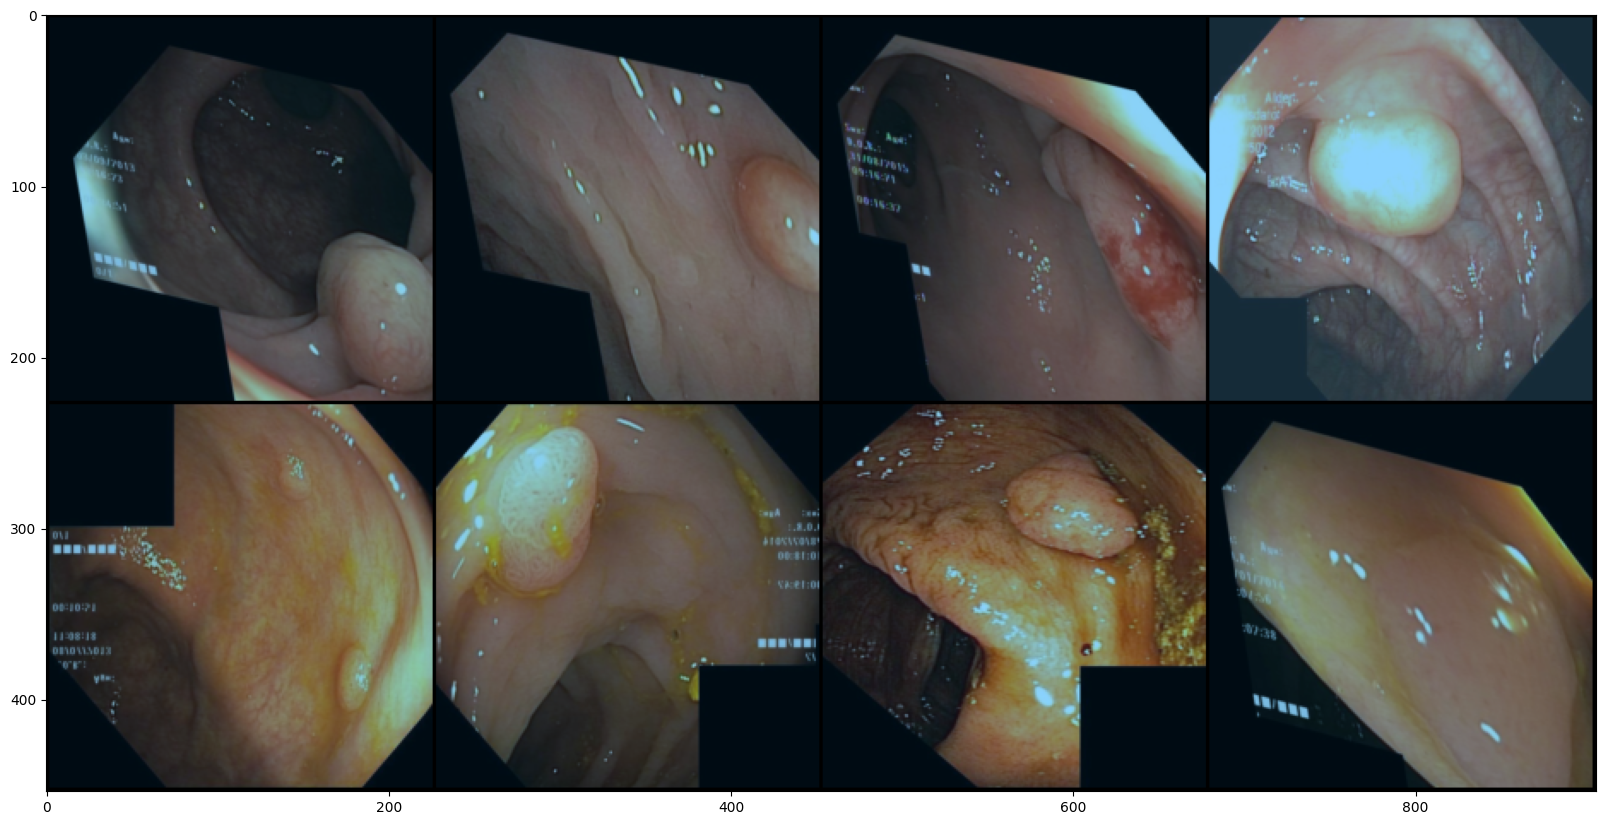

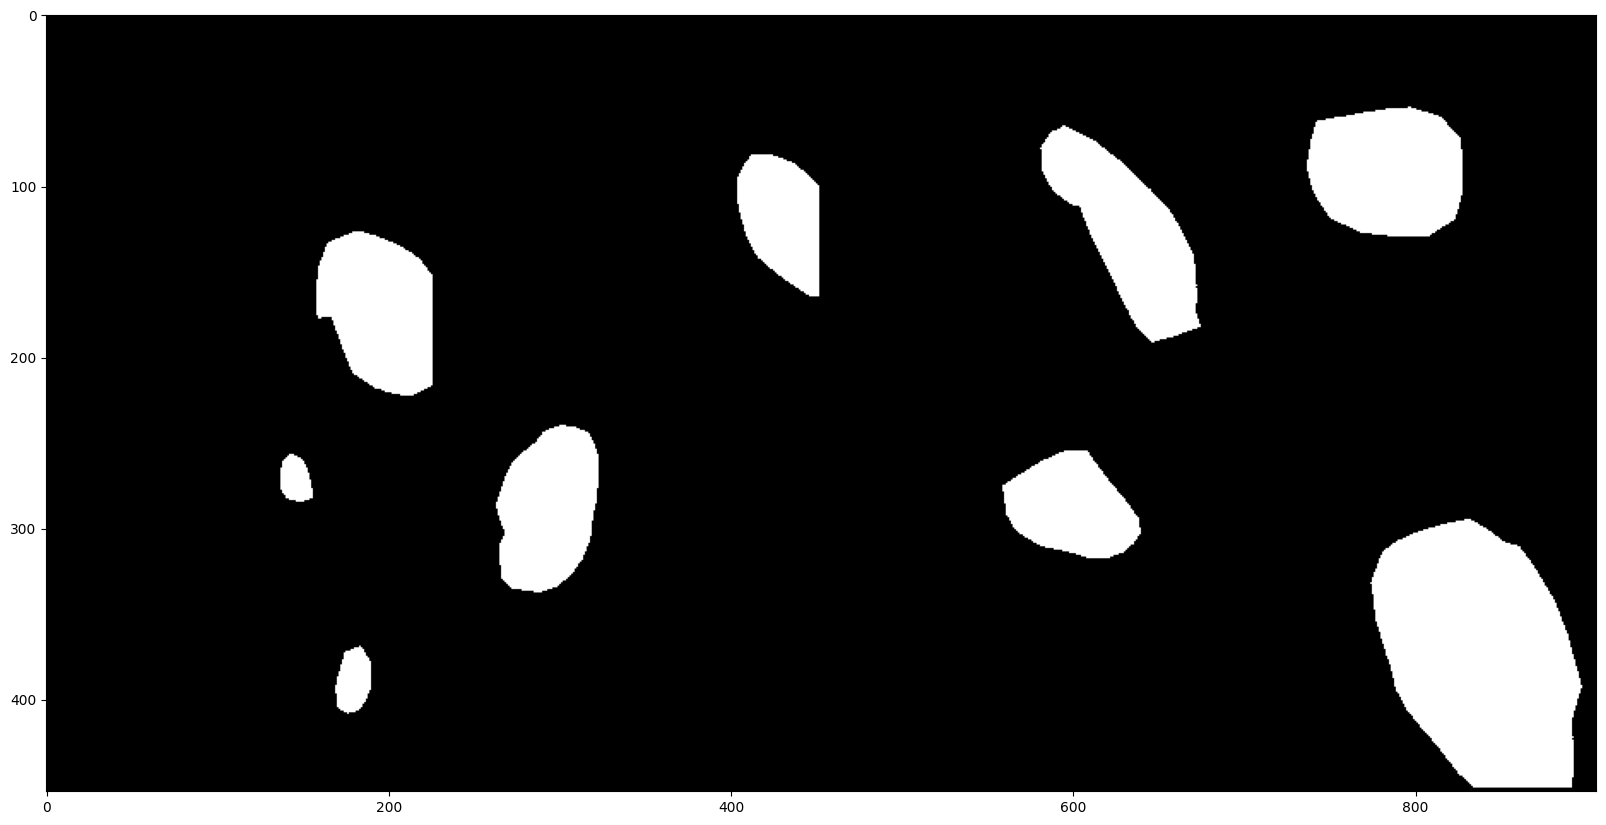

In [15]:
# Display a batch of images and masks
show_batch(train_features, train_labels)

In [16]:
# Check device availability

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# 2. Model

In [17]:

import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import rcParams
from pytorch_lightning.callbacks import EarlyStopping
from torchvision import models



#### Bài tập 3: Hoàn thành các đoạn code sau theo gợi ý

In [18]:
# Define the convolutional block
def conv3x3(in_, out):
    return nn.Conv2d(in_, out, 3, padding=1)

# Define the ConvRelu
class ConvRelu(pl.LightningModule):
    def __init__(self, in_: int, out: int):
        super().__init__()
        self.conv = conv3x3(in_, out)
        self.relu = nn.ReLU(inplace = True)

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x

In [19]:
class DecoderBlock(pl.LightningModule):
    def __init__(self, in_channels, middle_channels, out_channels, is_deconv=True):
        super(DecoderBlock, self).__init__()
        self.in_channels = in_channels
        if is_deconv:
            self.block = nn.Sequential(
                ConvRelu(in_channels, middle_channels),
                nn.ConvTranspose2d(middle_channels, out_channels, kernel_size = 3, stride = 2, padding = 1, output_padding = 1),
                nn.ReLU(inplace = True)
            )
        else:
            self.block = nn.Sequential(
                nn.Upsample(scale_factor = 2, mode = 'bilinear', align_corners=True),
                ConvRelu(in_channels, middle_channels),
                ConvRelu(middle_channels, out_channels)
            )

    def forward(self, x):
        return self.block(x)

In [20]:
# Update iou_pytorch to handle batch dimensions consistently
def iou_pytorch(outputs, labels):
    # Ensure outputs and labels are 4D: [batch, channel, H, W]
    if outputs.dim() == 3:
        outputs = outputs.unsqueeze(1)
    if labels.dim() == 3:
        labels = labels.unsqueeze(1)
    
    outputs = outputs.squeeze(1).byte()  # Remove channel dim -> [batch, H, W]
    labels = labels.squeeze(1).byte()
    
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum(dim=(1, 2))
    union = (outputs | labels).float().sum(dim=(1, 2))
    iou = (intersection + SMOOTH) / (union + SMOOTH)
    return iou

In [21]:
class Loss(nn.Module):
    def __init__(self, dice_weight=1):
        super().__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.dice_weight = dice_weight

    def __call__(self, outputs, targets):
        bce_loss = self.bce(outputs, targets)
        if self.dice_weight:
            # Dice loss calculation
            outputs = torch.sigmoid(outputs)
            eps = 1e-7
            outputs = outputs.view(-1)
            targets = targets.view(-1)
            intersection = (outputs * targets).sum()
            dice = (2. * intersection + eps) / (outputs.sum() + targets.sum() + eps)
            dice_loss = 1 - dice
            return bce_loss + self.dice_weight * dice_loss
        else:
            return bce_loss

In [22]:
def de_normalize(img, mean=mean, std=std):
    # Check if the input is a PyTorch tensor
    if isinstance(img, torch.Tensor):
        img = img.cpu().numpy()  # Move tensor to CPU and convert to NumPy array

    # Ensure mean and std are numpy arrays with correct shape
    mean = np.array(mean).reshape(1, 1, -1)
    std = np.array(std).reshape(1, 1, -1)

    result = img * std + mean
    result = np.clip(result, 0.0, 1.0)
    return result

@torch.inference_mode()
def display_prediction(model, image, target):
    model.eval()

    # Ensure model is on same device as input
    model = model.to(device)

    # Handle single image case
    if len(image.shape) == 3:
        image = image.unsqueeze(0).to(device)
    else:
        image = image.to(device)

    # Forward pass
    output = model(image)
    pred = (torch.sigmoid(output.squeeze()) > 0.5)
    pred = pred.cpu().numpy().astype(np.uint8)
    mask = target.squeeze().cpu().numpy()

    # Get the first image from the batch for visualization
    img_to_show = image[0].cpu().numpy() if len(image.shape) == 4 else image.cpu().numpy()

    # Transpose from (C, H, W) to (H, W, C) for matplotlib
    img_to_show = np.transpose(img_to_show, (1, 2, 0))

    # De-normalize
    img_to_show = de_normalize(img_to_show)

    # Visualization
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.axis('off')
    plt.title("Input Image")
    plt.imshow(img_to_show)

    plt.subplot(1, 4, 2)
    plt.axis('off')
    plt.title("Ground Truth Mask")
    plt.imshow(mask, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.axis('off')
    plt.title("Prediction")
    plt.imshow(pred.squeeze(), cmap='gray')

    plt.subplot(1, 4, 4)
    plt.axis('off')
    plt.title("Overlay Prediction")
    plt.imshow(img_to_show)
    plt.imshow(pred.squeeze(), alpha=0.5, cmap='jet')  # Overlay prediction with transparency

    plt.show()

In [23]:

# TODO: Định nghĩa lớp UNet11 kế thừa từ nn.Module
class UNet11(pl.LightningModule):
    def __init__(self, num_classes=1, num_filters=32, pretrained=False, is_deconv=False, lr=4e-5, weight_decay=1e-4):
        """
        :param num_classes: số lượng lớp đầu ra
        :param num_filters: số lượng bộ lọc sử dụng trong mạng
        :param pretrained: sử dụng mô hình VGG11 có trọng số pre-trained hay không
        """
        super().__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.save_hyperparameters()
        self.lr = lr
        self.weight_decay = weight_decay
        self.num_classes = num_classes
        if pretrained:
            self.encoder = models.vgg11(weights=models.vgg.VGG11_Weights.DEFAULT).features
        else:
            self.encoder = models.vgg11().features

        self.relu = nn.ReLU(inplace = True)
        self.conv1 = nn.Sequential(
            self.encoder[0], #3->64
            self.relu
        )

        self.conv2 = nn.Sequential(
            self.encoder[3], #64->128
            self.relu
        )

        self.conv3 = nn.Sequential(
            self.encoder[6],   #128->256
            self.relu,
            self.encoder[8], #256 -> 256
            self.relu
        )

        self.conv4 = nn.Sequential(
            self.encoder[11],   #256->512
            self.relu,
            self.encoder[13],   #512->512
            self.relu
        )

        self.conv5 = nn.Sequential(
            self.encoder[16],   #256->512
            self.relu,
            self.encoder[18],   #512->512
            self.relu
        )

        self.center = DecoderBlock(256 + num_filters * 8, num_filters * 8 * 2, num_filters * 8, is_deconv=is_deconv)
        self.dec5 = DecoderBlock(
            512 + num_filters * 8,    # center + conv5 = 768
            num_filters * 8 * 2,
            num_filters * 8,   #256
            is_deconv=is_deconv
        )

        self.dec4 = DecoderBlock(
            512 + num_filters * 8,    # dec5 + conv4 = 768
            num_filters * 8 * 2,
            num_filters * 4, #128
            is_deconv=is_deconv
        )

        self.dec3 = DecoderBlock(
            256 + num_filters * 4,    # dec4 + conv3 = 384
            num_filters * 4 * 2,
            num_filters * 2, #64
            is_deconv=is_deconv
        )

        self.dec2 = DecoderBlock(
            128 + num_filters * 2,  # dec3 + conv2 = 192
            num_filters * 2 * 2,
            num_filters,  #32
            is_deconv=is_deconv
        )

        self.dec1 = ConvRelu(
            64 + num_filters,   #dec2+conv1 = 96
            num_filters
        )

        self.final = nn.Conv2d(num_filters, num_classes, kernel_size=1)
        self.criterion = Loss() if num_classes == 1 else nn.CrossEntropyLoss()
    def forward(self, x):
        conv1 = self.conv1(x)
        conv2 = self.conv2(self.pool(conv1))
        conv3 = self.conv3(self.pool(conv2))
        conv4 = self.conv4(self.pool(conv3))
        conv5 = self.conv5(self.pool(conv4))
        center = self.center(self.pool(conv5))

        dec5 = self.dec5(torch.cat([center, conv5], 1))
        dec4 = self.dec4(torch.cat([dec5, conv4], 1))
        dec3 = self.dec3(torch.cat([dec4, conv3], 1))
        dec2 = self.dec2(torch.cat([dec3, conv2], 1))
        dec1 = self.dec1(torch.cat([dec2, conv1], 1))

        if self.num_classes > 1:
            x_out = F.log_softmax(self.final(dec1), dim=1)
        else:
            x_out = self.final(dec1)

        return x_out

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, labels)
        predict_labels = (torch.sigmoid(outputs.squeeze()) > 0.5).to(int)
        iou = iou_pytorch(predict_labels, labels)
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_iou", iou.mean(), prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, labels)
        predict_labels = (torch.sigmoid(outputs.squeeze()) > 0.5).to(int)
        iou = iou_pytorch(predict_labels, labels)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_iou", iou.mean(), prog_bar=True)

        # Visualize one prediction per epoch
        if batch_idx == 0:  # Only visualize the first batch
            display_prediction(self, inputs[0], labels[0])
        return loss

    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=self.lr, weight_decay=self.weight_decay)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name      | Type         | Params | Mode 
----------------------------------------------------
0  | pool      | MaxPool2d    | 0      | train
1  | encoder   | Sequential   | 9.2 M  | train
2  | relu      | ReLU         | 0      | train
3  | conv1     | Sequential   | 1.8 K  | train
4  | conv2     | Sequential   | 73.9 K | train
5  | conv3     | Sequential   | 885 K  | train
6  | conv4     | Sequential   | 3.5 M  | train
7  | conv5     | Sequential   | 4.7 M  | train
8  | center    | DecoderBlock | 3.5 M  | train
9  | dec5      | DecoderBlock | 4.7 M  | train
10 | dec4      | DecoderBlock | 4.1 M  | train
11 | dec3      | DecoderBlock | 1.0 M  | train
12 | dec2      | DecoderBlock | 258 K  | train
13 | dec1      | ConvRelu     | 27.7 K | train
14 | final     | Conv2d       | 33     | train
15 | criterion | Loss         | 0   

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\levan\anaconda3\envs\myenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


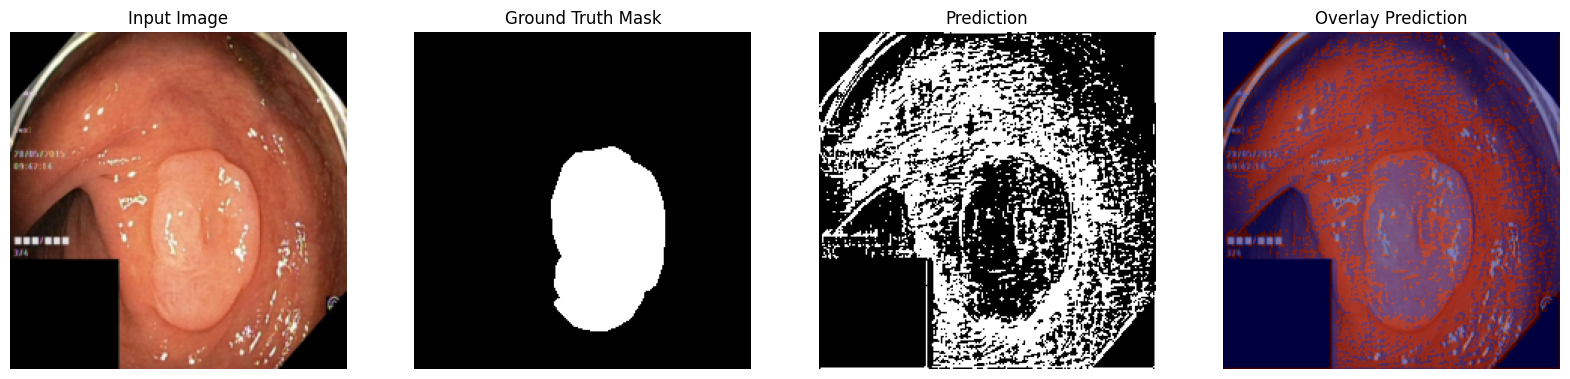

c:\Users\levan\anaconda3\envs\myenv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Epoch 0:  56%|█████▌    | 337/600 [2:19:08<1:48:35,  0.04it/s, v_num=1, train_loss=0.391, train_iou=0.714]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [26]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
torch.cuda.empty_cache()

# Create the model
model = UNet11(pretrained=True).to(device)

checkpoint_callback = ModelCheckpoint(
    monitor="train_loss",      # Metric to monitor
    mode="min",              # Minimize the monitored metric
    save_top_k=1,            # Save only the best model
    filename="best-checkpoint",  # Name for the checkpoint file
    save_weights_only=False, # Save full model
    verbose=True
)

early_stopping = EarlyStopping(
    monitor="val_iou",  # Metric to monitor
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    verbose=True,        # Print a message when stopping
    mode="min"           # Minimize the monitored metric (e.g., loss)
)

# Train the model
csv_logger = CSVLogger("logs", name="unet")
trainer = Trainer(
    max_epochs=30,
    accelerator="gpu",
    devices=1 if torch.cuda.is_available() else None,
    logger=csv_logger,
    callbacks=[early_stopping, checkpoint_callback],
)
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)


best_model_path = checkpoint_callback.best_model_path
print("Best model saved at:", best_model_path)
model_best = UNet11.load_from_checkpoint(best_model_path)
model = UNet11.load_from_checkpoint(best_model_path)


# 3. Train

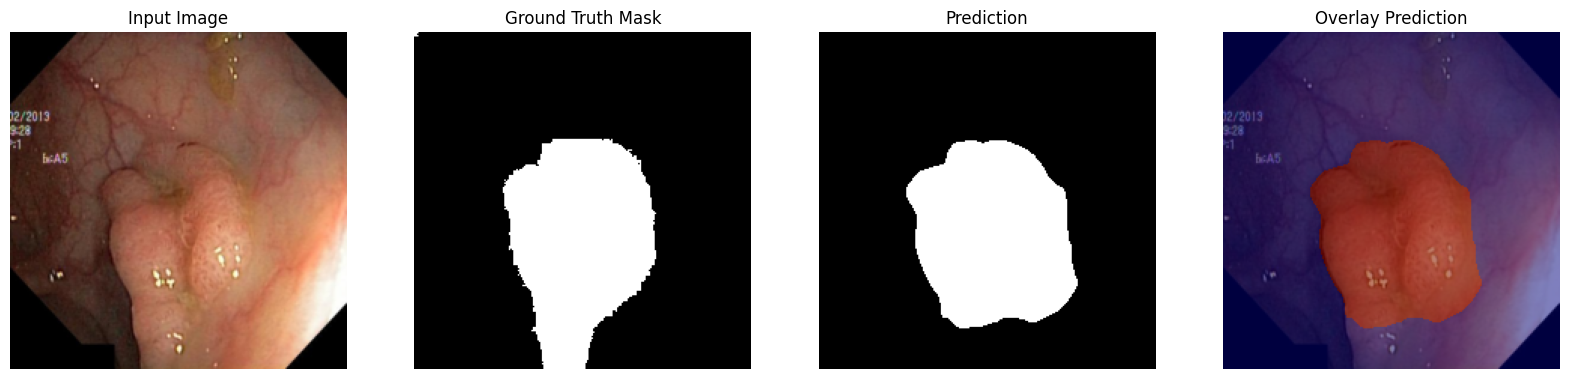

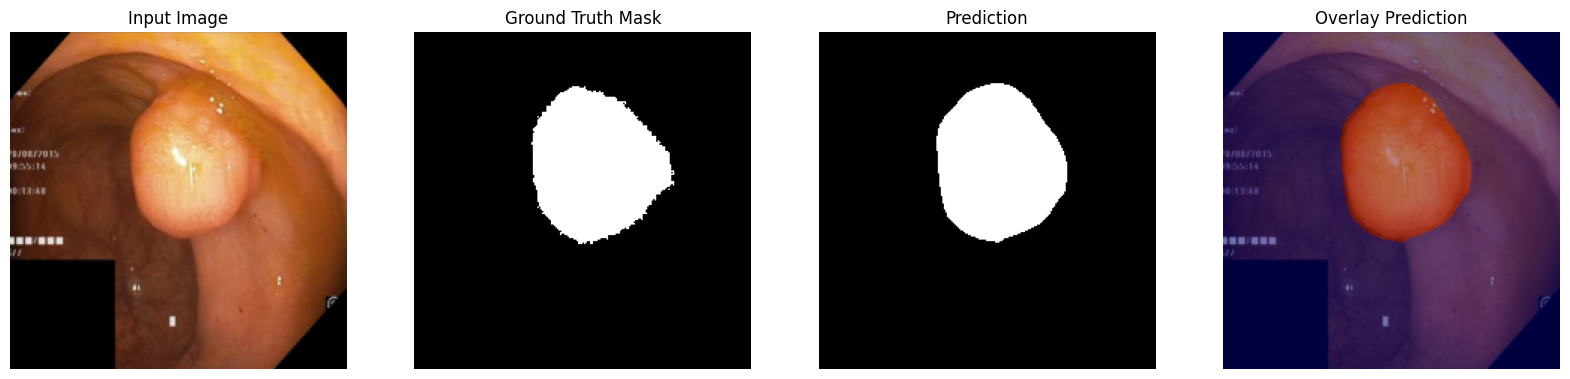

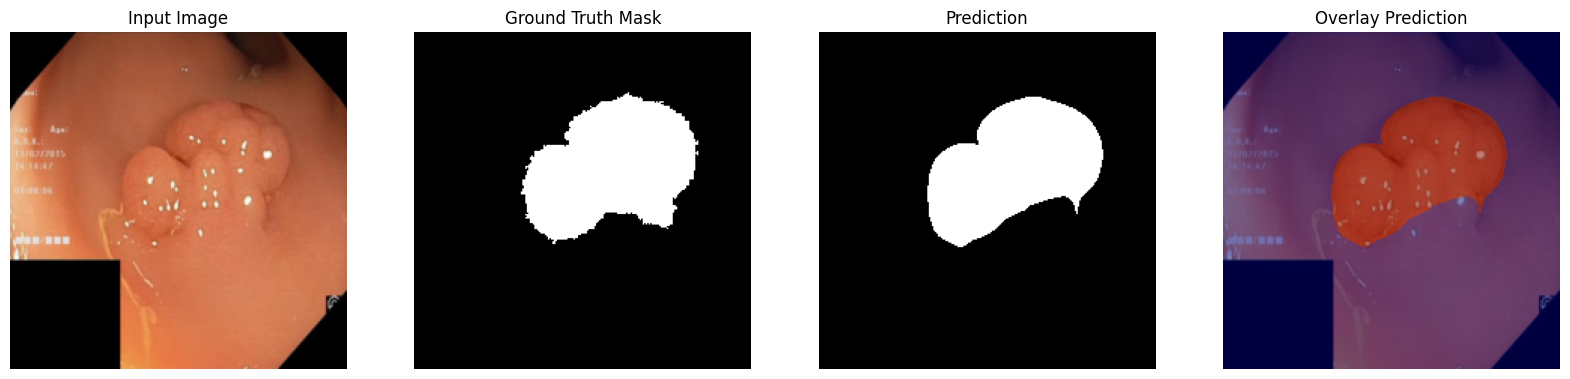

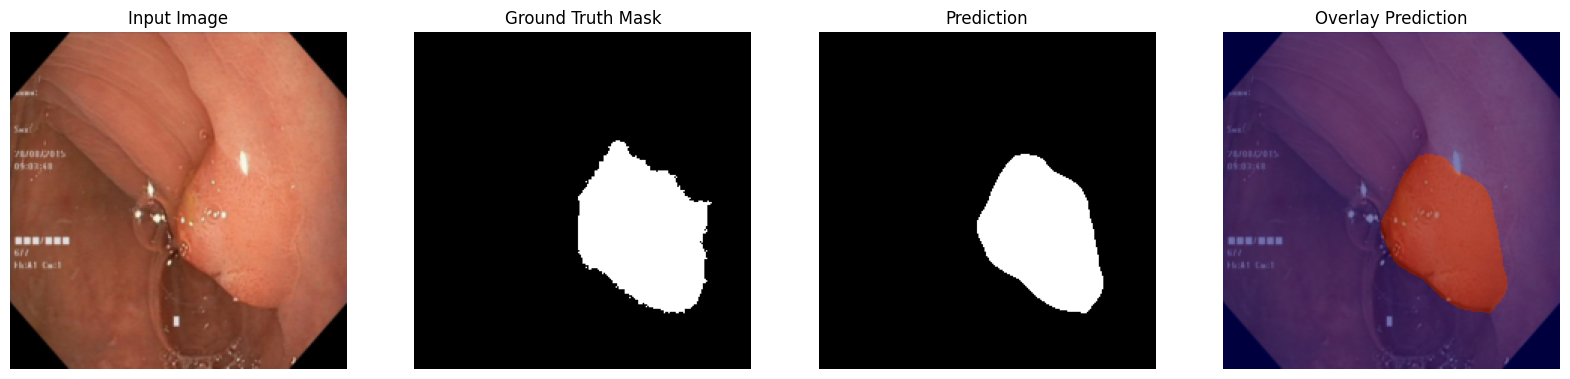

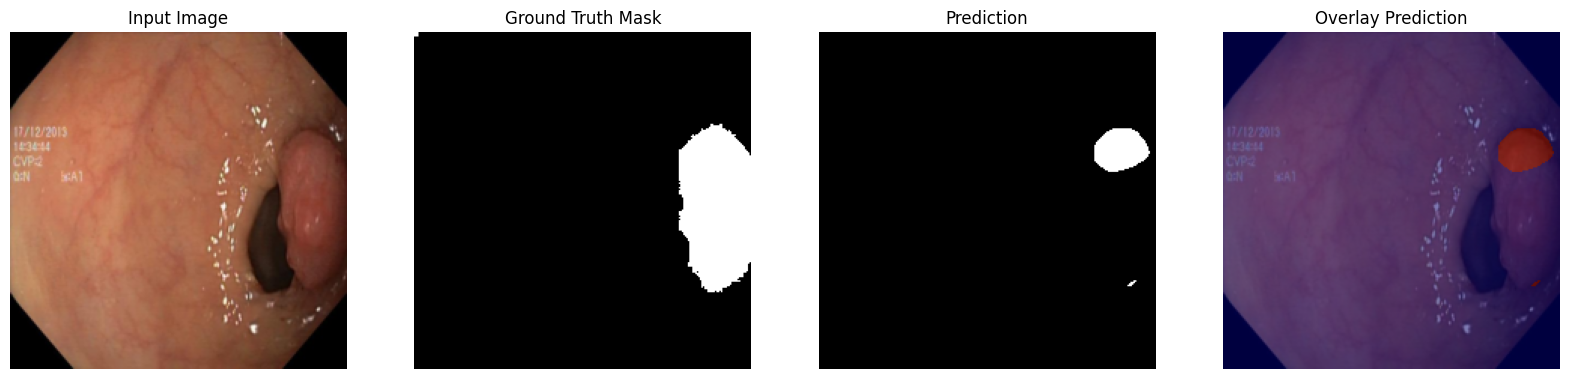

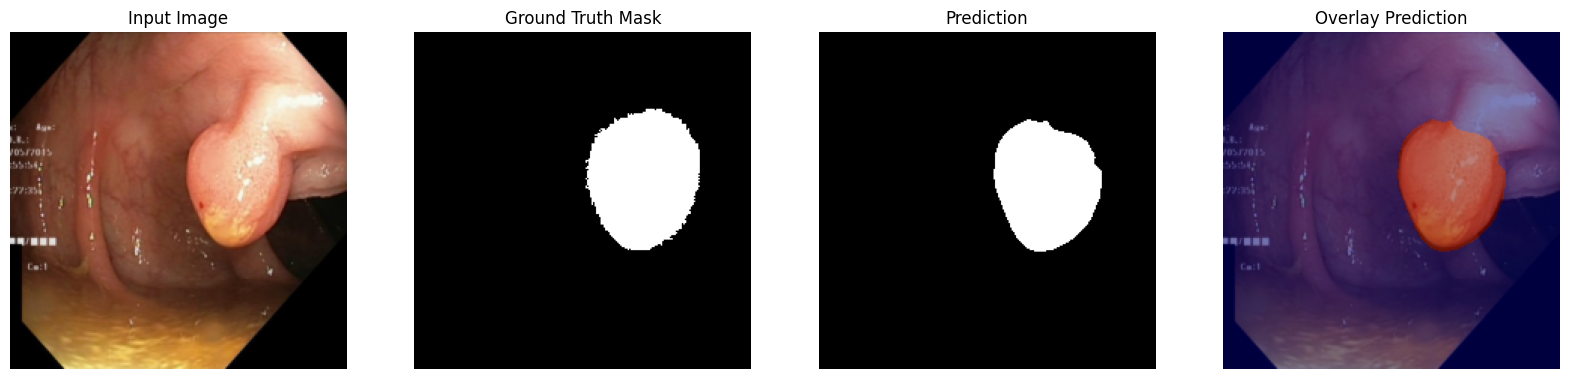

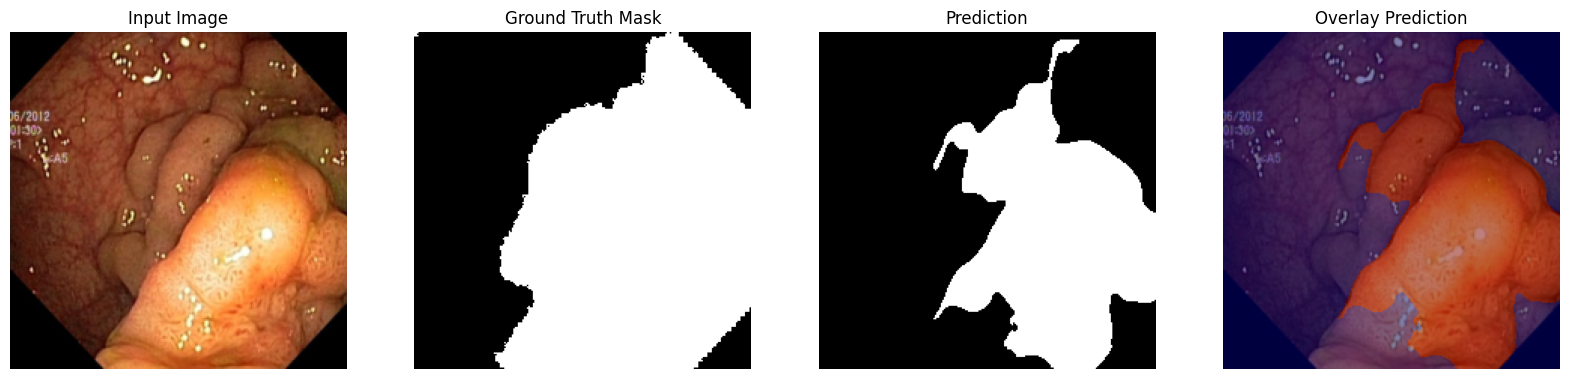

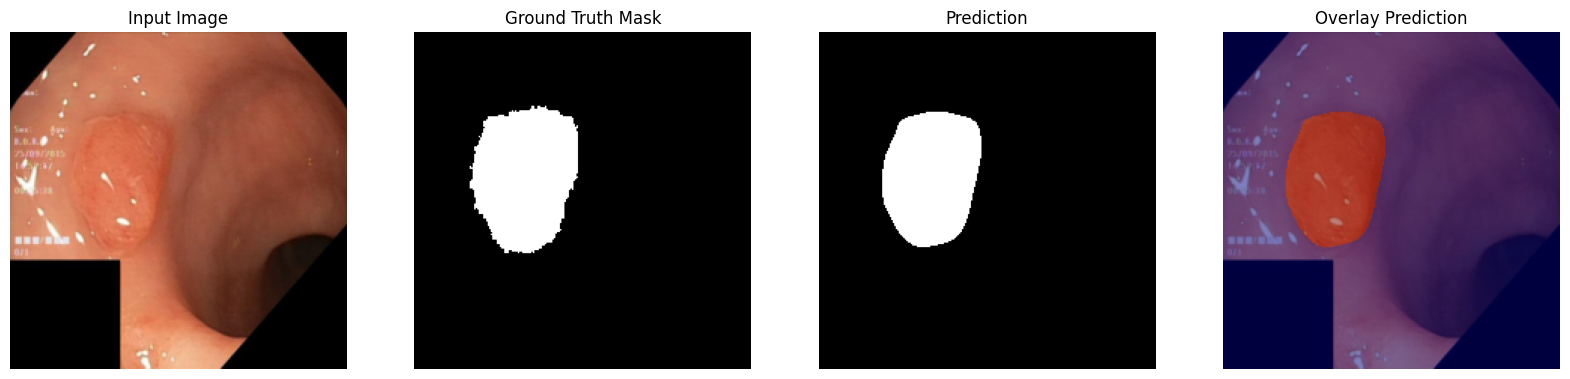

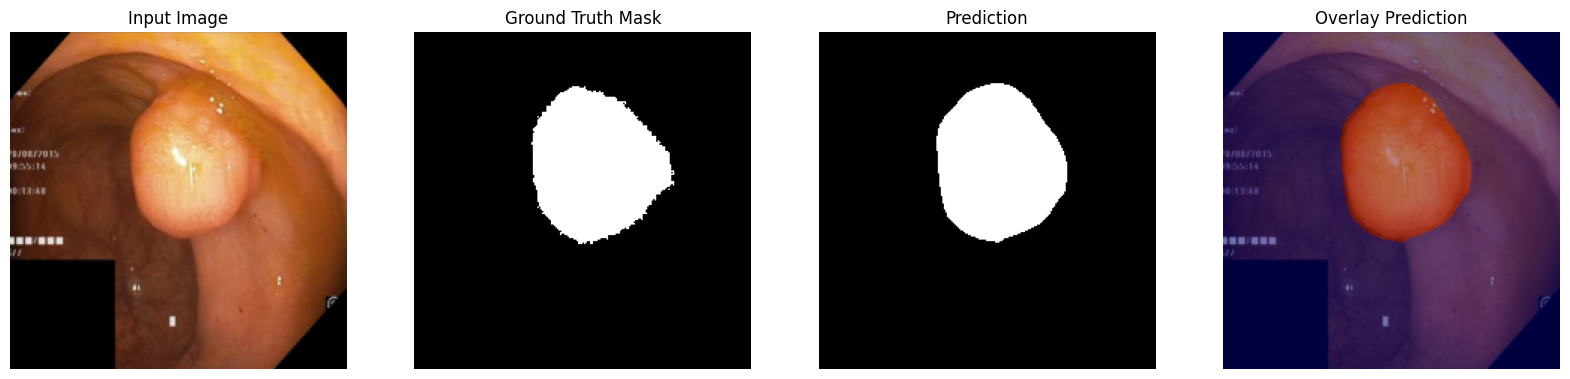

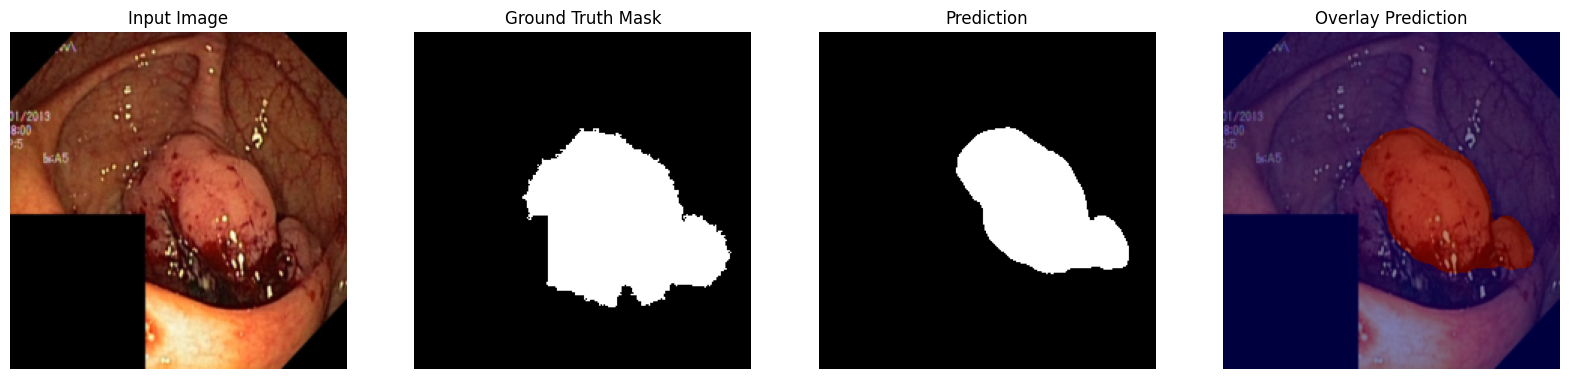

In [ ]:
num_samples = 10
for i in range(num_samples):
    idx = np.random.randint(0, len(val_dataset))
    image, mask = val_dataset[idx]
    display_prediction(model, image, mask)

In [ ]:
@torch.inference_mode()
def evaluate(model, val_loader, criterion):
    # Ensure the model is on the same device as the inputs
    model = model.to(device)
    model.eval()

    val_loss = 0.0
    val_IOU = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move inputs and labels to the same device as the model
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            total += labels.size(0)
            predict_labels = (torch.sigmoid(outputs.squeeze()) > 0.5).to(int)
            val_IOU += iou_pytorch(predict_labels, labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_IOU = val_IOU / total
    return val_loss, val_IOU

# Evaluate the model
evaluate(model, test_loader, model.criterion)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

<Axes: xlabel='epoch', ylabel='train_loss'>

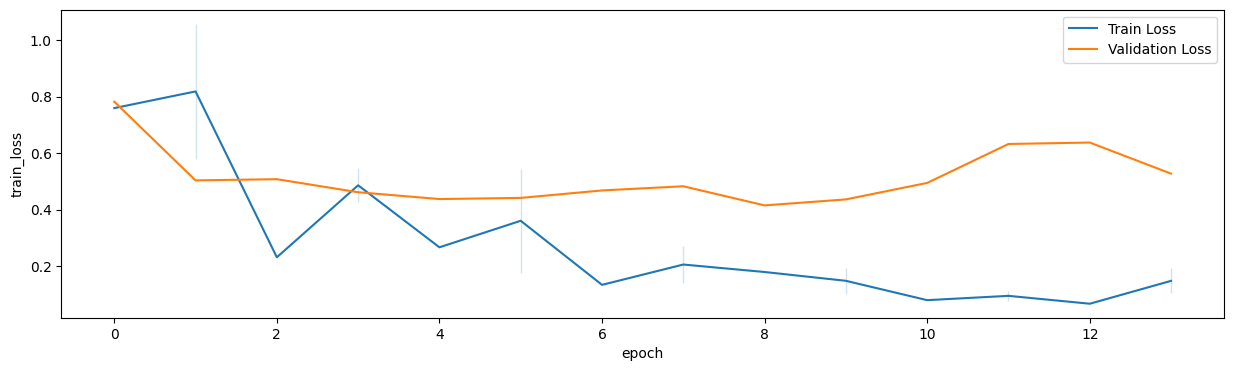

In [ ]:
import pandas as pd
import seaborn as sns
metrics_path = csv_logger.log_dir + "/metrics.csv"
df = pd.read_csv(metrics_path)

sns.lineplot(data=df, x='epoch', y='train_loss', label='Train Loss')    
sns.lineplot(data=df, x='epoch', y='val_loss', label='Validation Loss')